In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important;} </style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# For the Individual/ Women's Survey

In [3]:
dataset = pd.read_stata('dhs_data/raw/PKIR61FL.DTA') # Pakistan 2012-2013 -- filename decoded: PK = Pakistan, IR = Women's Survey, 61 = DHS 6, FL = flat-ascii .DTA = Stata-compatible

In [4]:
dataset.shape

(13558, 4107)

In [5]:
dataset.duplicated().value_counts()

False    13558
dtype: int64

In [6]:
dataset.columns = dataset.columns.str.strip() #strip whitespace

In [7]:
columns = dataset.columns.values.tolist()

In [8]:
# households = pd.read_sas('dhs_data/raw/PKHR61FL.SAS')

## Codebook  

## Wealth and Assets

### Cooking fuel

In [9]:
dataset.v161.value_counts()

wood                       6041
natural gas                4923
animal dung                 757
lpg                         547
straw/shrubs/grass          514
not a dejure resident       425
charcoal                    242
biogas                       53
coal, lignite                23
electricity                  22
99                            4
kerosene                      4
no food cooked in house       3
Name: v161, dtype: int64

In [165]:
dataset["wood"] = dataset.v161.map( lambda x: 1 if x == "wood" else 0)
dataset["natural_gas"] = dataset.v161.map( lambda x: 1 if x == "natural gas" else 0)
dataset["animal_dung"] = dataset.v161.map( lambda x: 1 if x == "animal dung" else 0)
dataset["lpg"] = dataset.v161.map( lambda x: 1 if x == "lpg" else 0)
dataset["grass"] = dataset.v161.map( lambda x: 1 if x == "straw/shrubs/grass" else 0)
dataset["charcoal"] = dataset.v161.map( lambda x: 1 if x == "charcoal" else 0)
dataset["biogas"] = dataset.v161.map( lambda x: 1 if x == "biogas" else 0)
dataset["kerosene"] = dataset.v161.map( lambda x: 1 if x == "kerosene" else 0)
dataset["electric_power"] = dataset.v161.map( lambda x: 1 if x == "electricity" else 0)
dataset["coal"] = dataset.v161.map( lambda x: 1 if x == "coal, lignite" else 0)

### Water source

In [11]:
dataset.v113.value_counts()

piped into dwelling                                     4351
tube well or borehole                                   2457
hand pump                                               2392
public tap/standpipe                                    1039
filtration plant                                         487
not a dejure resident                                    425
river/dam/lake/ponds/stream/canal/irrigation channel     377
protected well                                           365
unprotected spring                                       329
bottled water                                            295
unprotected well                                         211
piped to yard/plot                                       211
cart with small tank                                     185
protected spring                                         181
tanker truck                                             173
other                                                     55
rainwater               

In [12]:
safe_water = ("piped into dwelling","tube well or borehole","hand pump","public tap/standpipe","filtration plant","protected well","tanker truck","piped to yard/plot","protected spring")
unsafe_water = ("river/dam/lake/ponds/stream/canal/irrigation channel","unprotected spring","unprotected well","cart with small tank","rainwater")

In [13]:
dataset["safe_water"] = dataset.v113.map( lambda x: 1 if x in safe_water else 0)

In [14]:
dataset["unsafe_water"] = dataset.v113.map( lambda x: 1 if x in unsafe_water else 0)

### Toilet facility

In [15]:
dataset.v160.value_counts() #shared?

no                       9959
yes                      1215
not a dejure resident     425
9.0                        25
Name: v160, dtype: int64

In [16]:
dataset["shared_toilet"] = dataset.v160.map( lambda x: 1 if x == ("yes" or "not a dejure resident") else 0) 

In [17]:
dataset.v116.value_counts() #type

flush to piped sewer system              3847
flush to pit latrine                     2838
flush to septic tank                     2164
no facility/bush/field                   1934
pit latrine with slab                     846
pit latrine without slab/open pit         472
flush to somewhere else                   471
not a dejure resident                     425
ventilated improved pit latrine (vip)     295
flush, don't know where                   143
bucket toilet                              59
hanging toilet/latrine                     35
other                                      23
99                                          6
Name: v116, dtype: int64

In [18]:
dataset["improved_sani"] = dataset.v116.map( lambda x: 1 if x == ('flush to piped sewer system' or 'flush to pit latrine' or 'flush to septic tank' or "flush, don't know where" or "ventilated improved pit latrine (vip)" or "flush to somewhere else") else 0)

In [19]:
dataset["unimproved_sani"] = dataset.v116.map( lambda x: 1 if x == ('pit latrine with slab' or 'pit latrine without slab/open pit' or 'hanging toilet/latrine' or 'bucket toilet')else 0)

In [20]:
dataset["open_defec"] = dataset.v116.map( lambda x: 1 if x == ("no facility/bush/field") else 0) 

### Dejure resident?

In [21]:
dataset["dejure_res"] = dataset.v116.map( lambda x: 1 if x != ("not a dejure resident") else 0) 

### Assets

In [22]:
asset_components = ("electricity","radio","tv","refrigerator","bicycle","motorcycle","car/truck")

In [23]:
dataset.v119.value_counts() #electricity

yes                      12467
no                         663
not a dejure resident      425
9                            3
Name: v119, dtype: int64

In [24]:
dataset[asset_components[0]] = dataset.v119.map( lambda x: 1 if x == "yes" else 0) 

In [25]:
dataset.v120.value_counts() #radio

no                       10717
yes                       2404
not a dejure resident      425
9                           12
Name: v120, dtype: int64

In [26]:
dataset[asset_components[1]] = dataset.v120.map( lambda x: 1 if x == "yes" else 0) 

In [27]:
dataset.v121.value_counts() #television

yes                      8458
no                       4669
not a dejure resident     425
9                           6
Name: v121, dtype: int64

In [28]:
dataset[asset_components[2]] = dataset.v121.map( lambda x: 1 if x == "yes" else 0) 

In [29]:
dataset.v122.value_counts() #refrigerator

no                       6690
yes                      6432
not a dejure resident     425
9                          11
Name: v122, dtype: int64

In [30]:
dataset[asset_components[3]] = dataset.v122.map( lambda x: 1 if x == "yes" else 0) 

In [31]:
dataset.v123.value_counts() #bicycle

no                       9513
yes                      3605
not a dejure resident     425
9                          15
Name: v123, dtype: int64

In [32]:
dataset[asset_components[4]] = dataset.v123.map( lambda x: 1 if x == "yes" else 0) 

In [33]:
dataset.v124.value_counts() #motorcycle/scooter

no                       8435
yes                      4683
not a dejure resident     425
9                          15
Name: v124, dtype: int64

In [34]:
dataset[asset_components[5]] = dataset.v124.map( lambda x: 1 if x == "yes" else 0) 

In [35]:
dataset.v125.value_counts() #car/truck

no                       11600
yes                       1519
not a dejure resident      425
9                           14
Name: v125, dtype: int64

In [36]:
dataset[asset_components[6]] = dataset.v124.map( lambda x: 1 if x == "yes" else 0) 

### Floor, wall, roof types

In [37]:
dataset.v127.value_counts() #floor type

earth, sand               5433
cement                    4407
chips/terrazzo             824
bricks                     737
marble                     700
carpet                     488
not a dejure resident      425
mats                       226
ceramic tiles              177
dung                       109
wood planks                 18
99                          10
parquet, polished wood       2
other                        1
palm, bamboo                 1
Name: v127, dtype: int64

In [38]:
hard_floor = ("cement","chips/terrazzo","bricks","marble","carpet","ceramic tiles","wood planks","parquet, polished wood")
dirt_floor = ("earth, sand","mats","dung")

In [39]:
dataset["hard_floor"] = dataset.v127.map( lambda x: 1 if x in hard_floor else 0) 

In [40]:
dataset["dirt_floor"] = dataset.v127.map( lambda x: 1 if x in dirt_floor else 0) 

In [41]:
dataset.v128.value_counts() #wall type

cement                      3918
baked bricks                2456
unbaked bricks/mud          1889
bricks                      1289
mud/stones                   868
no walls                     711
cement blocks                571
stone with mud               556
not a dejure resident        425
stone with lime / cement     229
covered adobe                193
bamboo/sticks/mud            165
uncovered adobe               91
dirt                          64
cane / palm / trunks          63
tent                          22
bamboo with mud               18
other                         13
99                             8
wood planks / shingles         3
reused wood                    3
carton/plastic                 2
cardboard                      1
Name: v128, dtype: int64

In [42]:
sturdy_walls = ("cement","baked bricks","bricks","cement blocks","stone with lime / cement","reused wood")
dirt_walls = ("unbaked bricks/mud","mud/stones","stone with mud","covered adobe","dirt","bamboo with mud")
no_walls = ("no walls","cane / palm / trunks","tent","wood planks / shingles","carton/plastic","cardboard")

In [43]:
dataset["sturdy_walls"] = dataset.v128.map( lambda x: 1 if x in sturdy_walls else 0) 
dataset["dirt_walls"] = dataset.v128.map( lambda x: 1 if x in dirt_walls else 0) 
dataset["no_walls"] = dataset.v128.map( lambda x: 1 if x in no_walls else 0) 

In [44]:
dataset.v129.value_counts() #roof type

wood/ t iron/mud               3655
cement/rcc                     3530
rustic mat                     1515
wood planks                    1248
reinforced brick cement/rcc    1060
not a dejure resident           425
iron sheets/asbestos            416
palm / bamboo                   406
sod/grass                       382
calamine / cement fiber         354
thatch / palm leaf              171
other                           170
ceramic tiles                    66
cardboard                        50
no roof                          48
roofing shingles                 31
metal                            22
99                                9
Name: v129, dtype: int64

In [45]:
sturdy_roof = ("cement/rcc", "reinforced brick cement/rcc", "ceramic tiles", "roofing shingles", "metal")
mid_roof = ("wood/ t iron/mud", "wood planks", "iron sheets/asbestos", "calamine / cement fiber")
bad_roof = ("rustic mat", "palm / bamboo", "sod/grass", "thatch / palm leaf", "cardboard")

In [46]:
dataset["sturdy_roof"] = dataset.v129.map( lambda x: 1 if x in sturdy_roof else 0) 
dataset["mid_roof"] = dataset.v129.map( lambda x: 1 if x in mid_roof else 0) 
dataset["bad_roof"] = dataset.v129.map( lambda x: 1 if x in bad_roof else 0) 
dataset["no_roof"] = dataset.v129.map( lambda x: 1 if x == "no roof" else 0) 

## Recode education variable

In [47]:
dataset.v106.value_counts()

no education    7625
secondary       2415
primary         1831
higher          1687
Name: v106, dtype: int64

In [48]:
dataset.v107.value_counts() #years of ed achieved at highest level of ed

5.0    2494
2.0    1038
4.0     933
3.0     860
6.0     356
1.0     252
Name: v107, dtype: int64

In [49]:
pd.crosstab(dataset.v106,dataset.v107)

v107,1.0,2.0,3.0,4.0,5.0,6.0
v106,,,,,,
no education,0,0,0,0,0,0
primary,41,187,220,233,1150,0
secondary,161,172,612,137,1333,0
higher,50,679,28,563,11,356


In [50]:
dataset['no_edu'] = dataset.v106.map( lambda x: 1 if x == "no education" else 0) 
dataset['primary_edu'] = dataset.v106.map( lambda x: 1 if x == "primary" else 0) 
dataset['secondary_edu'] = dataset.v106.map( lambda x: 1 if x == "secondary" else 0) 
dataset['higher_edu'] = dataset.v106.map( lambda x: 1 if x == "higher" else 0) 

## Clean out households/women not selected for DV module

In [166]:
dataset["v044"].value_counts()

woman not selected                          9750
woman selected and interviewed              3687
woman selected, but privacy not possible     100
woman selected, but not interviewed           21
Name: v044, dtype: int64

In [167]:
dv = dataset[dataset.v044 == 'woman selected and interviewed']

In [168]:
dv.shape

(3687, 4144)

## Add child marriage variable -- All under 18

In [169]:
dv["child_marriage"] = dv.v511.map( lambda x: 1 if (x < 18) else 0) 

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [170]:
dv["child_marriage"].value_counts()

0    2125
1    1562
Name: child_marriage, dtype: int64

## Split Under 16 v. 16-18

In [171]:
dv["1617_marriage"] = dv.v511.map( lambda x: 1 if (x < 18 and x>=16) else 0) #16 is age of consent in Pak

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [172]:
dv["1617_marriage"].value_counts()

0    2840
1     847
Name: 1617_marriage, dtype: int64

In [173]:
dv["u16_marriage"] = dv.v511 < 16

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
dv.u16_marriage.describe()

count      3687
unique        2
top       False
freq       2972
Name: u16_marriage, dtype: object

In [175]:
dv["u16_marriage"] = dv.u16_marriage.map({True: 1, False: 0})

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [176]:
dv["u16_marriage"].value_counts()

0    2972
1     715
Name: u16_marriage, dtype: int64

## Domestic violence module

In [177]:
dv.d104.value_counts() #ever any emotional violence

no     2531
yes    1154
9.0       2
Name: d104, dtype: int64

In [178]:
dv = dv[dv["d104"] != 9.0]
dv = dv[dv["d106"] != 9.0]
dv = dv[dv["d107"] != 9.0]

In [179]:
dv["ever_emo_violence"] = dv.d104.map(lambda x: 1 if x == "yes" else 0) 

In [180]:
dv["d105j"].value_counts()  #physical violence, types A-J

never                                           3268
sometimes                                        168
yes, but not in the last 12 months               165
often                                             83
yes, but frequency in last 12 months missing       1
9.0                                                0
Name: d105j, dtype: int64

In [181]:
dv.d105a.value_counts()

never                                           3074
sometimes                                        296
yes, but not in the last 12 months               195
often                                            116
yes, but frequency in last 12 months missing       2
9.0                                                1
no response given                                  1
Name: d105a, dtype: int64

In [182]:
from string import ascii_lowercase

In [183]:
physical_violence = ("sometimes","often","yes, but not in the last 12 months","yes, but frequency in last 12 months missing")

# dv[col_name] = dv[col_name].map( lambda x: 1 if x in last_twelve else 0) 

for letter in ascii_lowercase[0:10]:
    col_name = "d105{}".format(letter)
    col_name_temp = str(col_name) + "_temp"
    dv[col_name_temp] = dv[col_name].map( lambda x: 1 if x in physical_violence else 0) 


In [184]:
dv.d105a_temp.value_counts()

0    3076
1     609
Name: d105a_temp, dtype: int64

In [185]:
dv.dtypes;

In [186]:
dv.reset_index(inplace=True);

In [187]:
dv[:5]

,index,caseid,v000,v001,v002,v003,v004,v005,v006,v007,...,d105a_temp,d105b_temp,d105c_temp,d105d_temp,d105e_temp,d105f_temp,d105g_temp,d105h_temp,d105i_temp,d105j_temp
0,0,1 2 2,PK6,1,2,2,1,2152140,11,2012,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,2,1 5 2,PK6,1,5,2,1,2152140,11,2012,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,6,1 8 8,PK6,1,8,8,1,2152140,11,2012,...,0,0,0,0,0,0,NaN,NaN,NaN,0
3,9,110 2,PK6,1,10,2,1,2152140,11,2012,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,16,119 2,PK6,1,19,2,1,2152140,11,2012,...,0,0,0,0,0,0,NaN,NaN,NaN,0


In [188]:
dv["physical_dv"] = dv["d105a_temp"] + dv["d105b_temp"] + dv["d105c_temp"] + dv["d105d_temp"] + dv["d105e_temp"] + dv["d105f_temp"] + dv["d105j_temp"]
dv["physical_dv"] = dv["physical_dv"].map( lambda x: 1 if x >= 1 else 0) 

In [189]:
dv["physical_dv"].value_counts()

0    2644
1    1041
Name: physical_dv, dtype: int64

# All ages, all assets in this notebook

In [158]:
# # Our main analysis will be on women ages 20-24 at time of survey
# df2024 = dv.copy(deep="True")
# df2024 = df2024[df2024.v447a.isin(range(20,25))];
# df2024.shape

In [190]:
dv["age"] = dv["v447a"] #woman's age

In [73]:
# df2024["interviewed"]= df2024["v044"]

In [74]:
# df2024["any_abuse"]= df2024["d107"]

In [75]:
# df2024.head()

In [76]:
# df2024["v511"].describe() #age at first cohabitation

# READY, SET....

In [433]:
# fuel_cols = ["wood","natural_gas","animal_dung","lpg","grass","charcoal","biogas","kerosene","electric_power","coal"]
wash_cols = ["improved_sani","unimproved_sani","open_defec","safe_water","unsafe_water", "shared_toilet"]
hh_cols = ["sturdy_walls","dirt_walls","no_walls","sturdy_roof","mid_roof","bad_roof","no_roof", "hard_floor", "dirt_floor"]

In [192]:
dv_cols = ["physical_dv","age","ever_emo_violence","u16_marriage", "child_marriage", "no_edu", "primary_edu", "secondary_edu", "higher_edu"]
asset_cols = list(asset_components)

In [434]:
clean_cols = dv_cols + asset_cols + wash_cols + hh_cols

In [435]:
df =dv[clean_cols]

In [436]:
df.head()

,physical_dv,age,ever_emo_violence,u16_marriage,child_marriage,no_edu,primary_edu,secondary_edu,higher_edu,safe_water,...,shared_toilet,sturdy_walls,dirt_walls,no_walls,sturdy_roof,mid_roof,bad_roof,no_roof,hard_floor,dirt_floor
0,0,25.0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,31.0,1,0,0,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
2,0,30.0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,0,46.0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,39.0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [437]:
df.columns

Index(['physical_dv', 'age', 'ever_emo_violence', 'u16_marriage',
       'child_marriage', 'no_edu', 'primary_edu', 'secondary_edu',
       'higher_edu', 'safe_water', 'unsafe_water', 'no_walls', 'dirt_walls',
       'mid_roof', 'bad_roof', 'sturdy_roof', 'no_roof', 'sturdy_walls',
       'dirt_floor', 'hard_floor', 'electricity', 'radio', 'tv',
       'refrigerator', 'bicycle', 'motorcycle', 'car/truck', 'open_defec',
       'unimproved_sani', 'wood', 'natural_gas', 'animal_dung', 'lpg', 'grass',
       'charcoal', 'biogas', 'kerosene', 'electric_power', 'coal',
       'improved_sani', 'unimproved_sani', 'open_defec', 'safe_water',
       'unsafe_water', 'shared_toilet', 'sturdy_walls', 'dirt_walls',
       'no_walls', 'sturdy_roof', 'mid_roof', 'bad_roof', 'no_roof',
       'hard_floor', 'dirt_floor'],
      dtype='object')

In [438]:
clean_cols2 = dv_cols + hh_cols
df2 = dv[clean_cols2]

# Models

## Physical abuse ever, age 16 and below

In [199]:
from sklearn.cross_validation import train_test_split
X, y = df.drop(['physical_dv',"ever_emo_violence", 'child_marriage'], axis=1),df['physical_dv']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

In [200]:
print(len(X),len(X_train),len(X_holdout))

3685 2579 1106


In [201]:
import seaborn as sns

In [202]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


models = {}
models['LogisticRegression'] = LogisticRegression()
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=6)
models['Gaussian'] = GaussianNB()
# models['SVC'] = SVC()
models['Decision Tree'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()

In [203]:
from sklearn.metrics import roc_curve

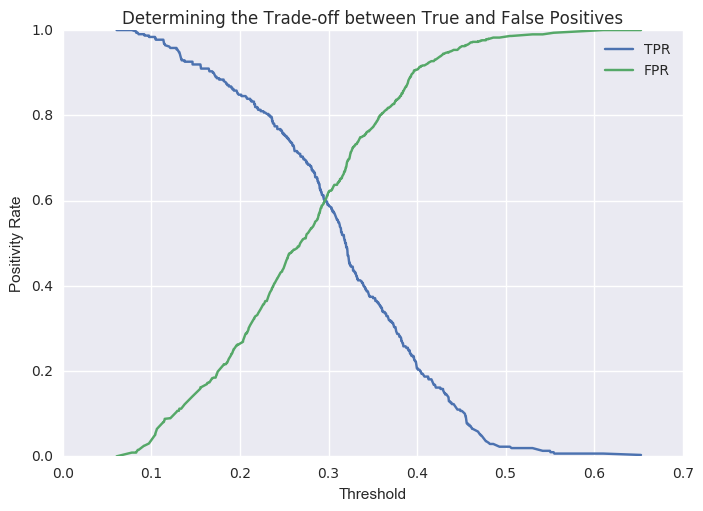

In [204]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_holdout)
fpr, tpr, thresholds = roc_curve(y_holdout, model.predict_proba(X_holdout)[:,1])
plt.plot(thresholds, tpr, label="TPR")
plt.plot(thresholds, 1-fpr, label="FPR")

plt.title('Determining the Trade-off between True and False Positives')
plt.xlabel('Threshold')
plt.ylabel('Positivity Rate')
plt.legend(loc='best')
plt.show()

In [275]:
model = LogisticRegression()
lr = model.fit(X_train,y_train)
y_pred = model.predict(X_holdout)

print("Logistic Regression")
print("Accuracy: {:.2f}".format(accuracy_score(y_holdout, y_pred)))
print(classification_report(y_holdout, model.predict(X_holdout)))
#     print("")
#what is the difference between score and accuracy_score in scikit-learn?

Logistic Regression
Accuracy: 0.72
             precision    recall  f1-score   support

          0       0.72      0.98      0.83       796
          1       0.37      0.02      0.04       310

avg / total       0.62      0.72      0.61      1106



In [278]:
y_pred_lower_threshold = lr.decision_function(X_holdout) > -.7

In [280]:
print("Logistic Regression, Lower Threshold")
print("Accuracy: {:.2f}".format(accuracy_score(y_holdout, y_pred_lower_threshold)))
print(classification_report(y_holdout, y_pred_lower_threshold))

Logistic Regression, Lower Threshold
Accuracy: 0.65
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       796
          1       0.38      0.42      0.40       310

avg / total       0.66      0.65      0.65      1106



In [288]:
y_pred_even_lower_threshold = lr.decision_function(X_holdout) > -.9

In [289]:
print("Logistic Regression, Lower Threshold")
print("Accuracy: {:.2f}".format(accuracy_score(y_holdout, y_pred_even_lower_threshold)))
print(classification_report(y_holdout, y_pred_even_lower_threshold))

Logistic Regression, Lower Threshold
Accuracy: 0.59
             precision    recall  f1-score   support

          0       0.80      0.57      0.66       796
          1       0.37      0.64      0.46       310

avg / total       0.68      0.59      0.61      1106



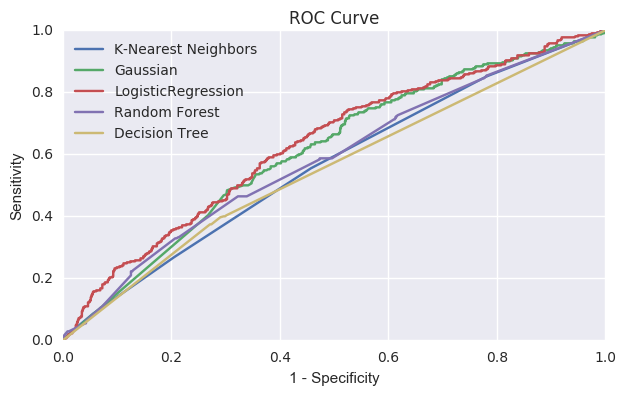

In [205]:
plt.figure(figsize = (7,4))

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_holdout)
    fpr, tpr, thresholds = roc_curve(y_holdout, model.predict_proba(X_holdout)[:,1])
#     plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, label=name)
    
#     print('Model: '+name)
#     print("Score: " + str(model.score(X_holdout,y_holdout)))
#     print("Accuracy: {:.2f}".format(accuracy_score(y_holdout, y_pred)))
#     print(classification_report(y_holdout, model.predict(X_holdout)))
#     print("")
#what is the difference between score and accuracy_score in scikit-learn?


plt.title('ROC Curve')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='best')
plt.show()

In [206]:
from sklearn.metrics import precision_recall_curve

In [207]:
def joel_pr_curve(truthvec, scorevec, model):
    threshvec = np.unique(scorevec)
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    return (recallvec, precisionvec, threshvec)

In [208]:
joel_recall_vec, joel_prec_vec, joel_thresh_vec = joel_pr_curve(y_holdout,pred_probs[:,1], "KNN")

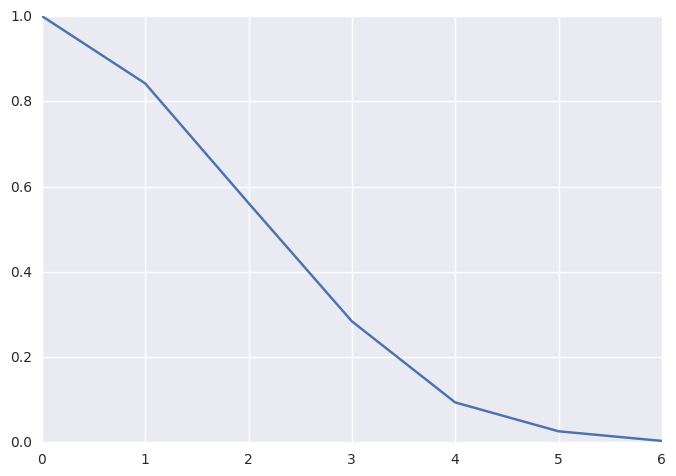

In [209]:
plt.plot(joel_recall_vec)

In [210]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [211]:
pred_probs = neigh.predict_proba(X_holdout)

In [212]:
pred_probs[:,1]

array([ 0.66666667,  0.16666667,  0.5       , ...,  0.16666667,
        0.5       ,  0.5       ])

In [213]:
def pr_curve(truthvec, scorevec, model):
    threshvec = np.unique(scorevec)
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.title(model)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

In [214]:
joel_recall_vec

array([ 1.        ,  0.84193548,  0.56129032,  0.28387097,  0.09354839,
        0.02580645,  0.00322581])

In [216]:
joel_thresh_vec[(joel_recall_vec>0.1) & (joel_recall_vec<0.8)]

array([ 0.33333333,  0.5       ])

(array([ 1.        ,  0.8516129 ,  0.55483871,  0.26774194,  0.08709677,
         0.01935484,  0.00322581]),
 array([ 0.28028933,  0.2979684 ,  0.32089552,  0.33739837,  0.375     ,
         0.42857143,  0.5       ]),
 array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
         0.83333333,  1.        ]))

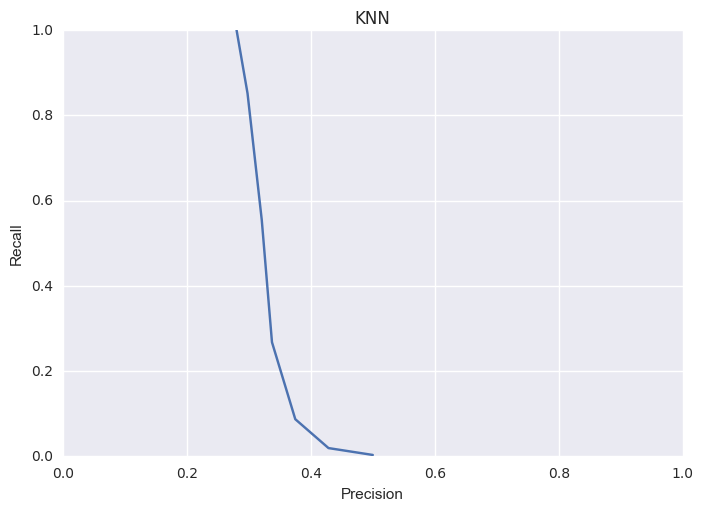

In [217]:
pr_curve(y_holdout, pred_probs[:,1], "KNN")

pred probs: [[ 0.69670291  0.30329709]
 [ 0.81821125  0.18178875]
 [ 0.61590039  0.38409961]
 ..., 
 [ 0.6911732   0.3088268 ]
 [ 0.73194058  0.26805942]
 [ 0.60461613  0.39538387]]


(array([ 1.        ,  1.        ,  1.        , ...,  0.00645161,
         0.00645161,  0.00322581]),
 array([ 0.28028933,  0.28054299,  0.2807971 , ...,  0.66666667,
         1.        ,  1.        ]),
 array([ 0.0607746 ,  0.06664006,  0.06862366, ...,  0.58579874,
         0.61015366,  0.6527882 ]))

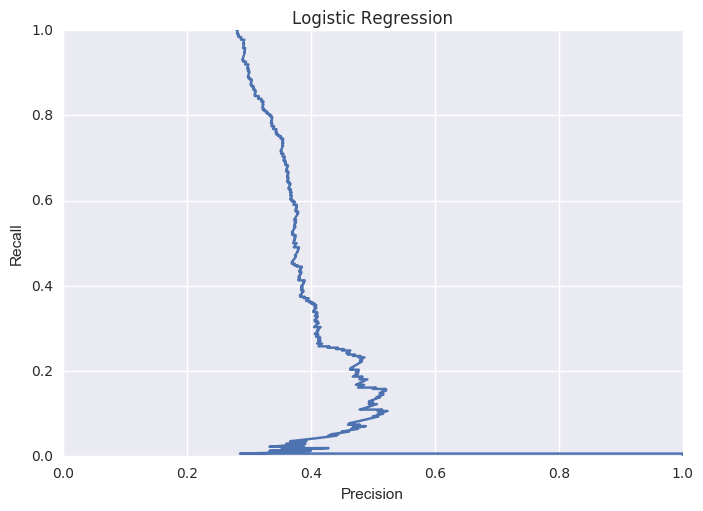

In [290]:
pred_probs = LogisticRegression().fit(X_train,y_train).predict_proba(X_holdout)
print("pred probs:",pred_probs)
pr_curve(y_holdout, pred_probs[:,1], "Logistic Regression")

In [219]:
joel_model = GaussianNB().fit(X_train,y_train)

In [220]:
joel_model.classes_

array([0, 1])

In [221]:
joel_model.predict_proba?

In [222]:
GaussianNB().predict_proba

<bound method BaseNB.predict_proba of GaussianNB()>

In [223]:
GaussianNB().fit(X_train,y_train).predict_proba

<bound method BaseNB.predict_proba of GaussianNB()>

In [224]:
[("probability of one: " + str(pred[1]), 'actual prediction: ' + str(y_pred)) for pred, y_pred in zip(pred_probs,y_pred)]

[('probability of one: 0.303297085228', 'actual prediction: 1'),
 ('probability of one: 0.181788754697', 'actual prediction: 0'),
 ('probability of one: 0.384099611721', 'actual prediction: 1'),
 ('probability of one: 0.0985918184869', 'actual prediction: 0'),
 ('probability of one: 0.261350133835', 'actual prediction: 0'),
 ('probability of one: 0.441839956624', 'actual prediction: 1'),
 ('probability of one: 0.238537637074', 'actual prediction: 0'),
 ('probability of one: 0.295146376246', 'actual prediction: 0'),
 ('probability of one: 0.329618962365', 'actual prediction: 0'),
 ('probability of one: 0.376985196302', 'actual prediction: 1'),
 ('probability of one: 0.188276374011', 'actual prediction: 0'),
 ('probability of one: 0.284758822124', 'actual prediction: 1'),
 ('probability of one: 0.238019658706', 'actual prediction: 0'),
 ('probability of one: 0.363012353499', 'actual prediction: 1'),
 ('probability of one: 0.24769094384', 'actual prediction: 0'),
 ('probability of one: 0.

In [225]:
joel_arr = np.array([[pred[1][i],y_pred[i] for i in range(len(y_pred))]) 

SyntaxError: invalid syntax (<ipython-input-225-d33f6b922a55>, line 1)

In [226]:
joel_df = pd.DataFrame([pred_probs[i][1] for i in range(len(pred_probs))], columns=['pred_proba'])

In [227]:
joel_df['y_pred'] = y_pred

In [228]:
joel_df.head()

,pred_proba,y_pred
0,0.303297,1
1,0.181789,0
2,0.384100,1
3,0.098592,0
4,0.261350,0


In [229]:
joel_df.groupby('y_pred').mean()

,pred_proba
y_pred,
0,0.267902
1,0.314783


In [230]:
joel_df.y_pred.value_counts()

0    772
1    334
Name: y_pred, dtype: int64

In [231]:
joel_df.sort_values(by='pred_proba')

,pred_proba,y_pred
428,0.060775,0
885,0.066640,0
869,0.068624,0
193,0.076881,0
433,0.077176,0
654,0.077207,0
1075,0.077845,0
166,0.077927,0
962,0.082924,0
1076,0.082924,0


(array([ 1.        ,  0.87741935,  0.87741935,  0.87419355,  0.87419355,
         0.87419355,  0.87419355,  0.87419355,  0.87096774,  0.74516129,
         0.74193548,  0.74193548,  0.74193548,  0.74193548,  0.73225806,
         0.73225806,  0.73225806,  0.73225806,  0.73225806,  0.72903226,
         0.61612903,  0.61612903,  0.61612903,  0.61612903,  0.61290323,
         0.60967742,  0.60967742,  0.60967742,  0.43225806,  0.42903226,
         0.42903226,  0.42903226,  0.42580645,  0.42580645,  0.42258065,
         0.41935484,  0.41935484,  0.26774194,  0.26774194,  0.26129032,
         0.26129032,  0.26129032,  0.25806452,  0.25806452,  0.25483871,
         0.25483871,  0.25483871,  0.25483871,  0.2483871 ,  0.16129032,
         0.15806452,  0.15806452,  0.15806452,  0.09677419,  0.09354839,
         0.09354839,  0.09354839,  0.07741935,  0.07419355,  0.04516129,
         0.04516129,  0.04516129,  0.00645161]),
 array([ 0.28028933,  0.29153269,  0.29184549,  0.29139785,  0.29171152,
  

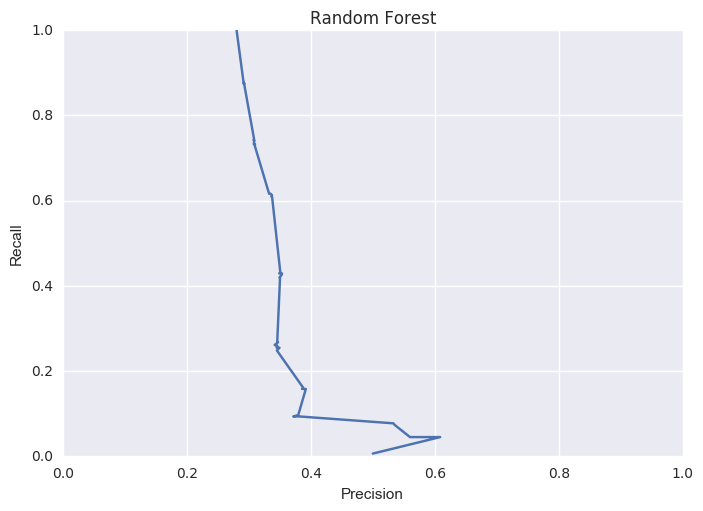

In [232]:
pred_probs = RandomForestClassifier().fit(X_train,y_train).predict_proba(X_holdout)
pr_curve(y_holdout, pred_probs[:,1], "Random Forest")

(array([ 1.        ,  0.39677419,  0.39354839,  0.39354839,  0.39354839,
         0.39354839,  0.36129032,  0.36129032]),
 array([ 0.28028933,  0.34647887,  0.34659091,  0.34757835,  0.34857143,
         0.35260116,  0.34674923,  0.34890966]),
 array([ 0.        ,  0.2       ,  0.25      ,  0.28571429,  0.33333333,
         0.5       ,  0.66666667,  1.        ]))

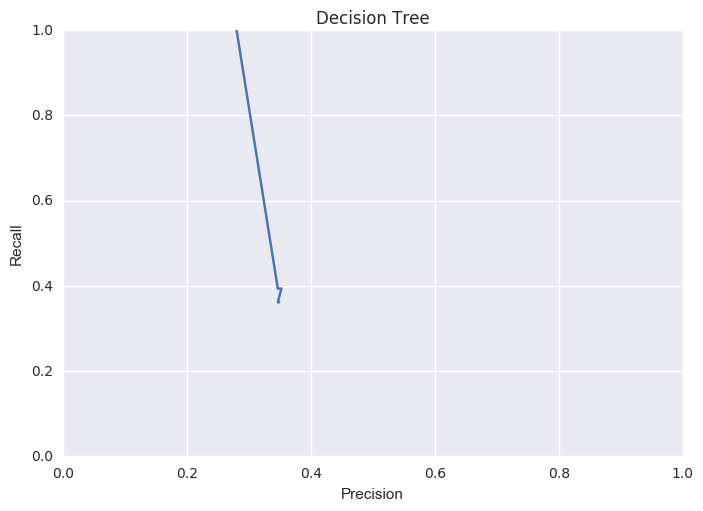

In [233]:
pred_probs = DecisionTreeClassifier().fit(X_train,y_train).predict_proba(X_holdout)
pr_curve(y_holdout, pred_probs[:,1], "Decision Tree")

### Emotional abuse model

In [202]:
from sklearn.cross_validation import train_test_split
X, y = df.drop(['12mo_physical_dv',"ever_emo_violence"], axis=1),df['ever_emo_violence']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

In [420]:
print(len(X),len(X_train),len(X_holdout))

479 335 144


In [463]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


models = {}
models['LogisticRegression'] = LogisticRegression()
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=6)
models['Gaussian'] = GaussianNB()
models['SVC'] = SVC()
models['Decision Tree'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()

In [464]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_holdout)
    print('Model: '+name)
    print("Score: " + str(model.score(X_holdout,y_holdout)))
    print("Accuracy: {:.2f}".format(accuracy_score(y_holdout, y_pred)))
    print(classification_report(y_holdout, model.predict(X_holdout)))
    print("")
#what is the difference between score and accuracy_score in scikit-learn?

Model: SVC
Score: 0.701388888889
Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.70      1.00      0.82       101
          1       0.00      0.00      0.00        43

avg / total       0.49      0.70      0.58       144


Model: K-Nearest Neighbors
Score: 0.680555555556
Accuracy: 0.68
             precision    recall  f1-score   support

          0       0.71      0.93      0.80       101
          1       0.36      0.09      0.15        43

avg / total       0.60      0.68      0.61       144


Model: Decision Tree
Score: 0.701388888889
Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.71      0.98      0.82       101
          1       0.50      0.05      0.09        43

avg / total       0.65      0.70      0.60       144


Model: Random Forest
Score: 0.701388888889
Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.71      0.98      0.82       101
          1      

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [301]:
import statsmodels.api as sm

In [302]:
df.head()

,physical_dv,age,ever_emo_violence,u16_marriage,child_marriage,no_edu,primary_edu,secondary_edu,higher_edu,electricity,...,natural_gas,animal_dung,lpg,grass,charcoal,biogas,kerosene,electric_power,coal,Intercept
0,0,25.0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,31.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,30.0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,46.0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,39.0,1,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [262]:
df["Intercept"] = 1

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [303]:
df.columns

Index(['physical_dv', 'age', 'ever_emo_violence', 'u16_marriage',
       'child_marriage', 'no_edu', 'primary_edu', 'secondary_edu',
       'higher_edu', 'electricity', 'radio', 'tv', 'refrigerator', 'bicycle',
       'motorcycle', 'car/truck', 'improved_sani', 'unimproved_sani',
       'open_defec', 'safe_water', 'unsafe_water', 'shared_toilet',
       'sturdy_walls', 'dirt_walls', 'no_walls', 'sturdy_roof', 'mid_roof',
       'bad_roof', 'no_roof', 'hard_floor', 'dirt_floor', 'wood',
       'natural_gas', 'animal_dung', 'lpg', 'grass', 'charcoal', 'biogas',
       'kerosene', 'electric_power', 'coal', 'Intercept'],
      dtype='object')

In [304]:
X, y = df.drop(['physical_dv',"ever_emo_violence","u16_marriage",'motorcycle','car/truck'], axis=1),df['physical_dv']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [305]:
model = sm.Logit(y, X)

In [306]:
results = model.fit()
predict = results.predict()
print(results.summary())
print (np.exp(results.params))

         Current function value: 0.567899
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            physical_dv   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                           35
Date:                Thu, 27 Oct 2016   Pseudo R-squ.:                 0.04602
Time:                        23:20:55   Log-Likelihood:                -2092.7
converged:                      False   LL-Null:                       -2193.7
                                        LLR p-value:                 2.331e-25
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
age                 0.0046      0.005      0.967      0.334        -0.005     0.014
child_marriage      0.1306      0.079      1.657  

/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/statsmodels/base/model.py:971: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ANTARES/anaconda2/envs/snakes/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= s

In [259]:
X, y = df2.drop(['physical_dv',"ever_emo_violence","u16_marriage"], axis=1),df['physical_dv']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [260]:
model = sm.Logit(y, X)

In [261]:
results = model.fit()
predict = results.predict()
print(results.summary())
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.574918
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            physical_dv   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3670
Method:                           MLE   Df Model:                           14
Date:                Thu, 27 Oct 2016   Pseudo R-squ.:                 0.03423
Time:                        18:58:57   Log-Likelihood:                -2118.6
converged:                       True   LL-Null:                       -2193.7
                                        LLR p-value:                 6.613e-25
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
age                0.0035      0.005      0.768      0.443        -0.006     0.013
child_marriage   

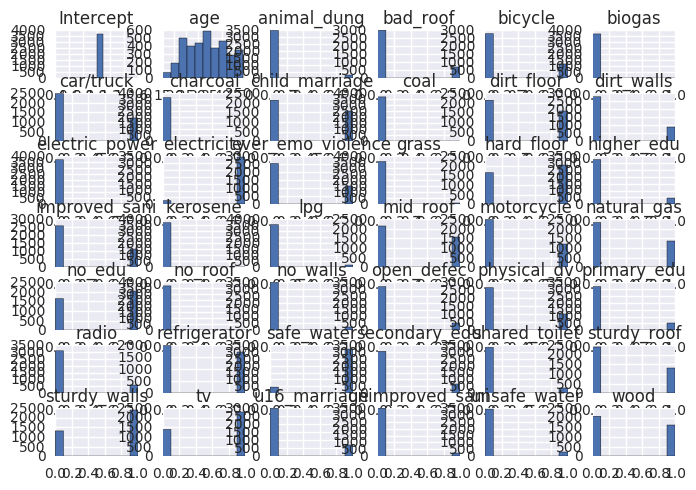

In [267]:
df.hist()
plt.show()

# PCA

In [489]:
asset_cols = ["safe_water", "unsafe_water", "no_walls", "dirt_walls", "mid_roof", "bad_roof", "sturdy_roof", "no_roof", "sturdy_walls" ,"dirt_floor","hard_floor", "electricity","radio","tv","refrigerator","bicycle","motorcycle","car/truck", "open_defec", "improved_sani", "shared_toilet","unimproved_sani"]

In [490]:
asset_df = dv[asset_cols]

## Choose number of components

In [491]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(asset_df)
X_scaled = scaler.transform(asset_df)

In [492]:
eig_vals, Q = np.linalg.eig(np.cov(X_scaled, rowvar=0)*99)

In [493]:
eig_vals

array([  5.55546485e+02,   1.93868426e+02,   1.79776555e+02,
         1.52101590e+02,   1.43270922e+02,   6.68129391e+00,
         2.98031450e+00,   7.77565999e-01,   2.10919813e+01,
         1.10021170e+02,   9.95348555e+01,   1.02535210e+02,
         4.49802233e+01,   9.12216512e+01,   5.22701422e+01,
         5.70359109e+01,   5.92616212e+01,   6.82431026e+01,
         7.43068910e+01,   8.03636424e+01,   8.27216511e+01,
         6.14140446e-15])

In [494]:
ordered = sorted(zip(eig_vals, Q.T), reverse=True)

In [495]:
ordered;

In [496]:
a = eig_vals[0]/sum(eig_vals)

In [497]:
b = eig_vals[1]/sum(eig_vals)

In [498]:
c = eig_vals[2]/sum(eig_vals)

In [499]:
d =eig_vals[3]/sum(eig_vals)

In [500]:
e = eig_vals[4]/sum(eig_vals)

In [501]:
a+b+c+d+e #explains this percentage of the variance.... we need more assets in the dataset! Possibility to link to household survey in future iteration

0.5620898384193912

In [502]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(asset_df)
pca.components_;

In [503]:
# print("pca.components_.shape: {}".format(pca.components_.shape))

In [504]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline

# import numpy as np

# data = asset_df

# pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5))])

# pipeline.fit_transform(data).shape

In [505]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data pca = PCA(n_components=2)
# fit PCA model to breast cancer data pca.fit(X_scaled)
    # transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (3685, 22)
Reduced shape: (3685, 5)


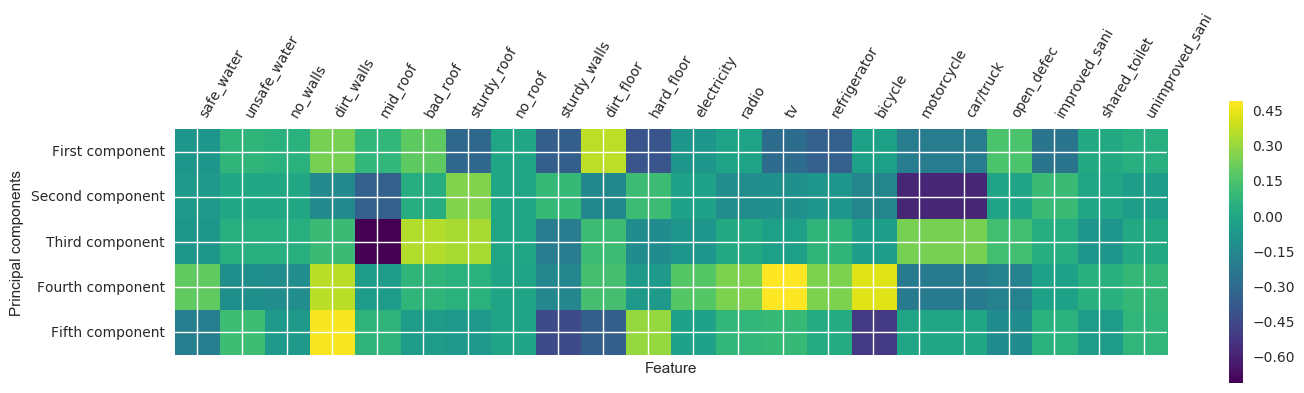

In [506]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["First component", "Second component", "Third component", "Fourth component", "Fifth component"])
plt.colorbar()
plt.xticks(range(len(asset_df.columns)), asset_df.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [507]:
asset_df.columns

Index(['safe_water', 'unsafe_water', 'no_walls', 'dirt_walls', 'mid_roof',
       'bad_roof', 'sturdy_roof', 'no_roof', 'sturdy_walls', 'dirt_floor',
       'hard_floor', 'electricity', 'radio', 'tv', 'refrigerator', 'bicycle',
       'motorcycle', 'car/truck', 'open_defec', 'improved_sani',
       'shared_toilet', 'unimproved_sani'],
      dtype='object')

In [508]:
df3 = df.drop(fuel_cols, axis=1)

In [509]:
pca_df = df3.drop(asset_cols, axis=1)

In [510]:
X_pca[0]

array([-0.40881635, -1.16081644, -0.97057093, -2.08542245, -0.54873631])

In [511]:
df_components = pd.DataFrame(X_pca)

In [512]:
pca_df.shape

(3685, 9)

In [513]:
result_df = pd.concat([pca_df, df_components], axis=1, join='inner')

In [514]:
result_df.head()

,physical_dv,age,ever_emo_violence,u16_marriage,child_marriage,no_edu,primary_edu,secondary_edu,higher_edu,0,1,2,3,4
0,0,25.0,0,0,1,1,0,0,0,-0.408816,-1.160816,-0.970571,-2.085422,-0.548736
1,0,31.0,1,0,0,0,1,0,0,-0.865141,-1.006029,-1.192600,-1.881813,0.665299
2,0,30.0,1,0,0,0,0,0,1,-1.672377,-1.532594,-0.866967,-0.549028,-0.281227
3,0,46.0,0,0,0,0,0,1,0,-1.959533,-0.531786,1.190145,-0.278186,-0.707814
4,0,39.0,1,0,1,1,0,0,0,-0.933334,-1.004626,-0.941950,-2.073635,0.822657


## Moment of truth! Let's see if "child marriage" influences coefficients of LR model

In [515]:
X, y = result_df.drop(['physical_dv',"ever_emo_violence","u16_marriage","child_marriage"], axis=1),df['physical_dv']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [516]:
model = sm.Logit(y, X)

In [517]:
results = model.fit()
predict = results.predict()
print(results.summary())
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.575614
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            physical_dv   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3675
Method:                           MLE   Df Model:                            9
Date:                Fri, 28 Oct 2016   Pseudo R-squ.:                 0.03306
Time:                        01:27:51   Log-Likelihood:                -2121.1
converged:                       True   LL-Null:                       -2193.7
                                        LLR p-value:                 9.306e-27
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
age               0.0044      0.005      0.945      0.345        -0.005     0.013
no_edu           -0.

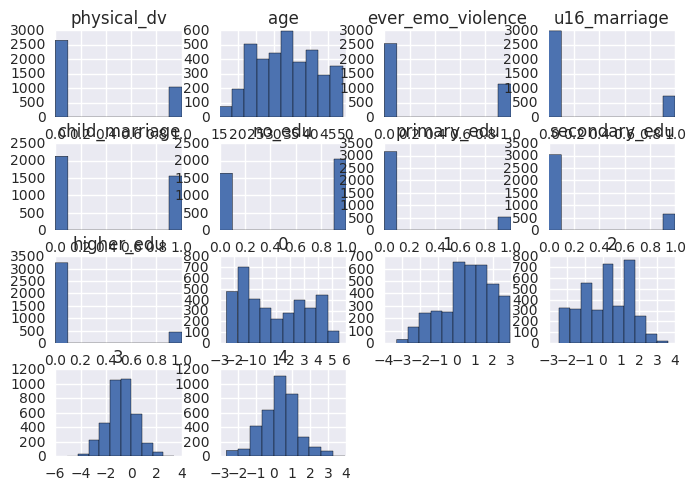

In [518]:
result_df.hist()
plt.show()

In [519]:
X, y = result_df.drop(['physical_dv',"ever_emo_violence","child_marriage"], axis=1),df['physical_dv']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [520]:
model = sm.Logit(y, X)

In [521]:
results = model.fit()
predict = results.predict()
print(results.summary())
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.574040
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            physical_dv   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3674
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Oct 2016   Pseudo R-squ.:                 0.03571
Time:                        01:28:11   Log-Likelihood:                -2115.3
converged:                       True   LL-Null:                       -2193.7
                                        LLR p-value:                 1.586e-28
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
age               0.0043      0.005      0.934      0.350        -0.005     0.013
u16_marriage      0.

In [522]:
X, y = result_df.drop(['physical_dv',"ever_emo_violence","u16_marriage"], axis=1),df['physical_dv']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [523]:
model = sm.Logit(y, X)

In [524]:
results = model.fit()
predict = results.predict()
print(results.summary())
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.575350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            physical_dv   No. Observations:                 3685
Model:                          Logit   Df Residuals:                     3674
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Oct 2016   Pseudo R-squ.:                 0.03351
Time:                        01:28:44   Log-Likelihood:                -2120.2
converged:                       True   LL-Null:                       -2193.7
                                        LLR p-value:                 1.544e-26
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
age                0.0047      0.005      1.009      0.313        -0.004     0.014
child_marriage   